# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [30]:
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}"
city_url = f"{url}&q=Plano"
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': -96.6989, 'lat': 33.0198},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 303.54,
  'feels_like': 305.14,
  'temp_min': 300.79,
  'temp_max': 305.18,
  'pressure': 1015,
  'humidity': 52},
 'visibility': 10000,
 'wind': {'speed': 3.6, 'deg': 170},
 'clouds': {'all': 0},
 'dt': 1689836234,
 'sys': {'type': 2,
  'id': 2009819,
  'country': 'US',
  'sunrise': 1689852708,
  'sunset': 1689903246},
 'timezone': -18000,
 'id': 4719457,
 'name': 'Plano',
 'cod': 200}

In [32]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        celsius_max_temp = city_max_temp - 273.15

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": celsius_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kingsland
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | port saint john's
Processing Record 4 of Set 1 | invercargill
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | tura
Processing Record 7 of Set 1 | mount gambier
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | calabozo
Processing Record 10 of Set 1 | ugoofaaru
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | charters towers
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | karratha
Processing Record 15 of Set 1 | xilin hot
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | carutapera
Processing Record 18 of Set 1 | hammerfest
Processing Record 19 of Set 1 | bayganin
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | ushuaia
Pro

In [33]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [34]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kingsland,30.8000,-81.6898,27.74,91,26,1.59,US,1689836931
1,adamstown,-25.0660,-130.1015,22.66,78,100,12.23,PN,1689836980
2,port saint john's,-31.6229,29.5448,13.35,68,73,6.62,ZA,1689836980
3,invercargill,-46.4000,168.3500,4.47,78,4,4.57,NZ,1689836980
4,ribeira grande,38.5167,-28.7000,20.43,94,75,3.60,PT,1689836981


In [35]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kingsland,30.8000,-81.6898,27.74,91,26,1.59,US,1689836931
1,adamstown,-25.0660,-130.1015,22.66,78,100,12.23,PN,1689836980
2,port saint john's,-31.6229,29.5448,13.35,68,73,6.62,ZA,1689836980
3,invercargill,-46.4000,168.3500,4.47,78,4,4.57,NZ,1689836980
4,ribeira grande,38.5167,-28.7000,20.43,94,75,3.60,PT,1689836981


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

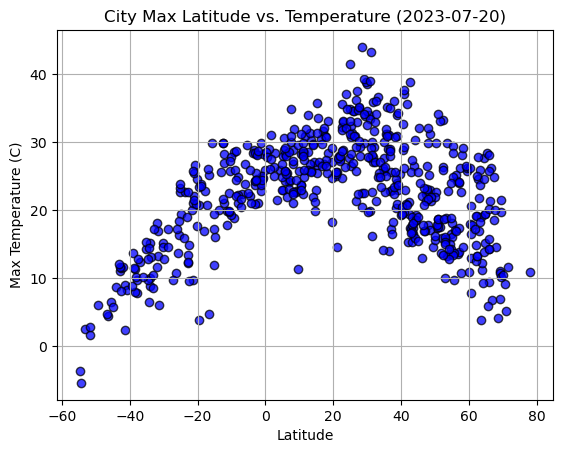

In [38]:
# Build scatter plot for latitude vs. temperature
dt_object = datetime.fromtimestamp(city_weather["dt"])
formatted_date = dt_object.strftime("%Y-%m-%d")
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o', facecolors='b', edgecolors='black', alpha=0.75)
plt.title(f"City Latitude vs. Max Temperature ({formatted_date})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

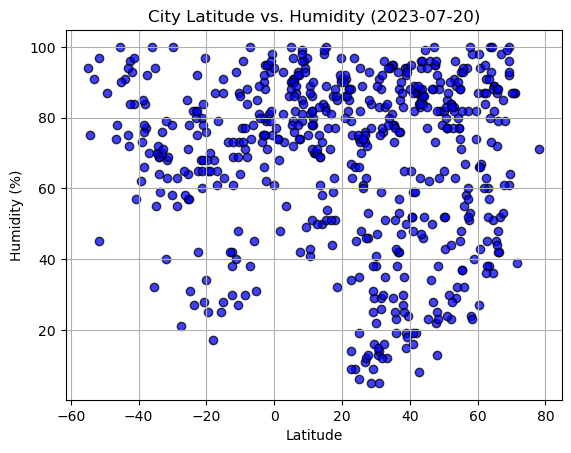

In [40]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o', facecolors='b', edgecolors='black', alpha=0.75)
plt.title(f"City Latitude vs. Humidity ({formatted_date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

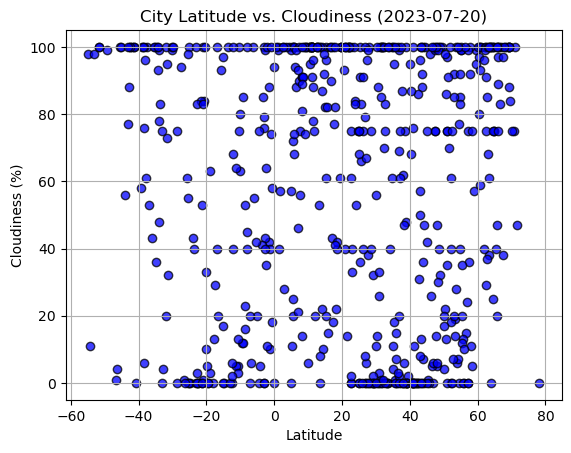

In [41]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o', facecolors='b', edgecolors='black', alpha=0.75)
plt.title(f"City Latitude vs. Cloudiness ({formatted_date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

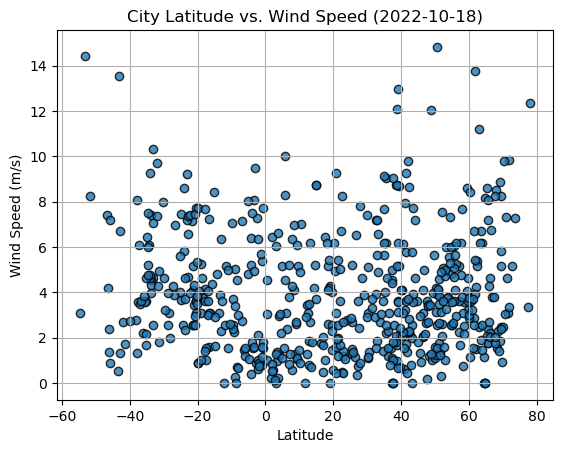

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o', facecolors='b', edgecolors='black', alpha=0.75)
plt.title(f"City Latitude vs. Wind Speed ({formatted_date})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0),:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kingsland,30.8000,-81.6898,27.74,91,26,1.59,US,1689836931
4,ribeira grande,38.5167,-28.7000,20.43,94,75,3.60,PT,1689836981
5,tura,25.5198,90.2201,31.33,70,66,2.66,IN,1689836981
8,calabozo,8.9242,-67.4293,22.90,96,100,0.51,VE,1689836981
9,ugoofaaru,5.6667,73.0000,28.34,79,100,6.38,MV,1689836982


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0),:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,22.66,78,100,12.23,PN,1689836980
2,port saint john's,-31.6229,29.5448,13.35,68,73,6.62,ZA,1689836980
3,invercargill,-46.4000,168.3500,4.47,78,4,4.57,NZ,1689836980
6,mount gambier,-37.8333,140.7667,9.74,77,61,5.03,AU,1689836981
7,blackmans bay,-43.0167,147.3167,11.07,75,77,5.56,AU,1689836981


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.5348348047255406


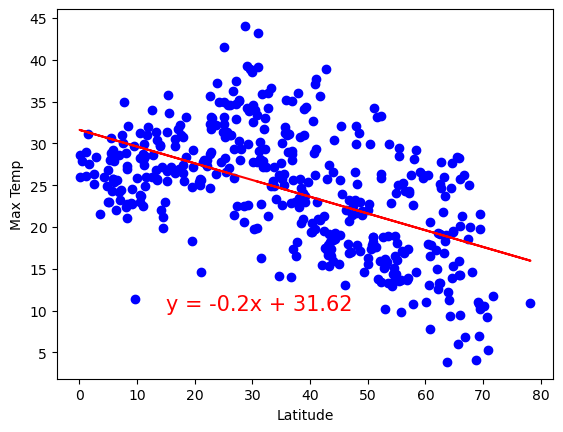

In [40]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, marker='o', facecolors='b')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(15,10),fontsize=15,color='r')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue}")

The r-value is: 0.8415623628423408


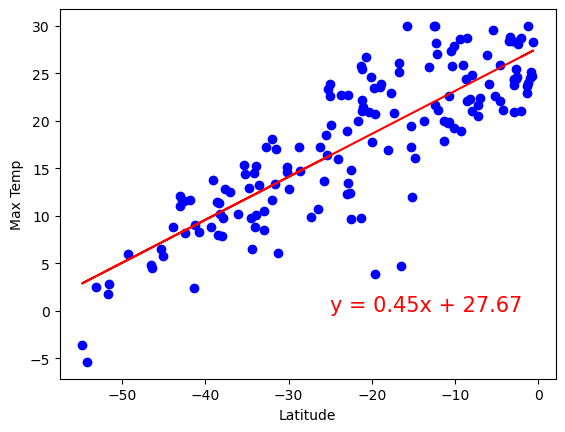

In [67]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, marker='o', facecolors='b')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-25,0),fontsize=15,color='r')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [68]:
# For the northern hemisphere, there is a negative correlation between increasing latitude and decreasing max temperatures. 
# For the southern hemisphere, there is a more significant correlation between increasing latitude and increasing max tempeartures.
# This makes sense, as from the southern hemisphere, the closer you get to the equator the more the temperatures would increase.
# Likewise, if you are located in the northern hemisphere, the more north you travel from the equator the more the temperatures would decrease.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.07011797889347522


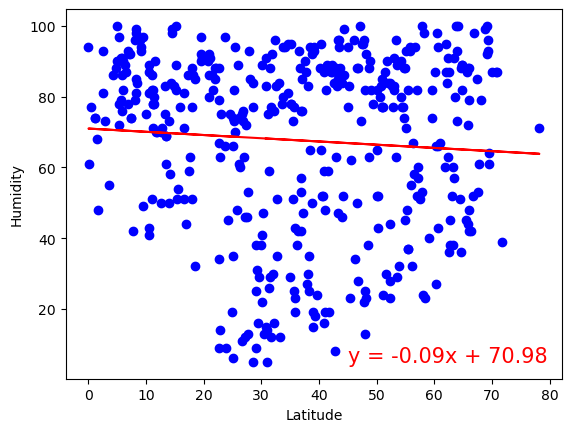

In [79]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, marker='o', facecolors='b')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(45,5),fontsize=15,color='r')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")

The r-value is: -0.07072025381092173


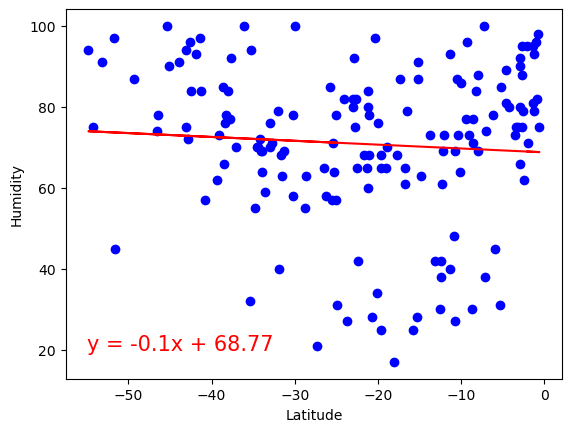

In [81]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, marker='o', facecolors='b')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color='r')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# Overall there is little correlation between increasing latitude and increasing max humidity. 
# As such increasing humidity is not very dependent on increasing latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.06262831872704924


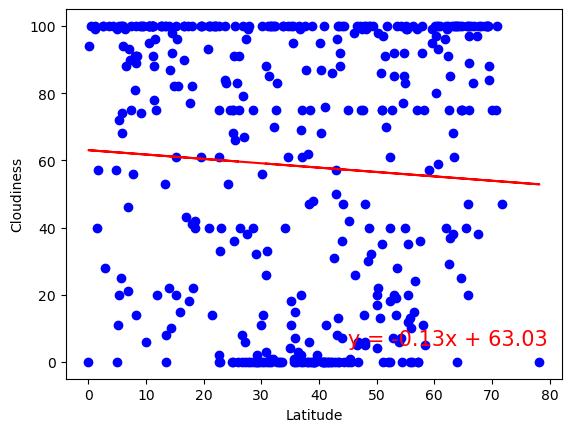

In [82]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, marker='o', facecolors='b')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(45,5),fontsize=15,color='r')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue}")

The r-value is: -0.28228440974316443


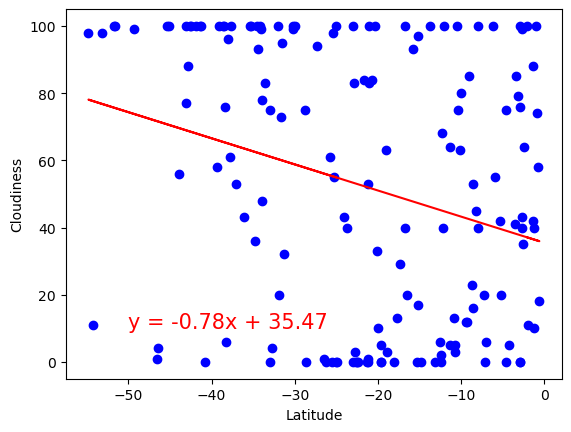

In [84]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, marker='o', facecolors='b')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color='r')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# There is little correlation of increasing latitude and increasing cloudiness in the northern hemisphere. 
# However there is a slightly more significant correlation between increasing latitude and decreasing cloudiness in the southern hemisphere.
# What's interesting is that in both graphs, a large amount of the data is located at the extremes (0 and 100 cloudiness)
# As such most cities tend to be either very cloudy or not very cloudy at all

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.16268258269792943


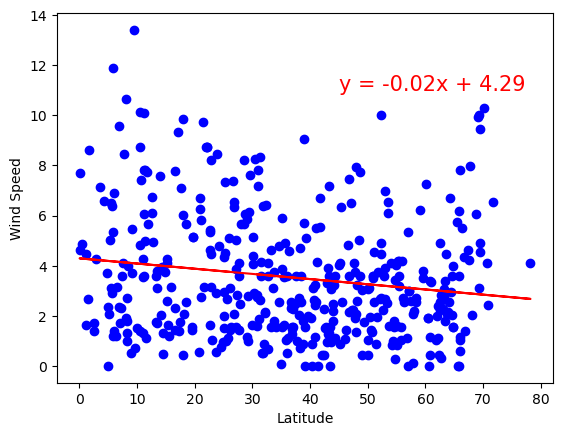

In [88]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, marker='o', facecolors='b')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(45,11),fontsize=15,color='r')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue}")

The r-value is: -0.21664038972867877


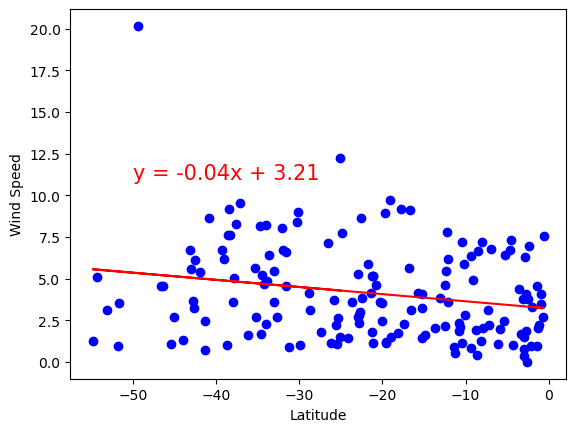

In [90]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, marker='o', facecolors='b')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-50,11),fontsize=15,color='r')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# In both graphs, there is a slight correlation between increasing latitude and decreasing wind speed.